### Q2. What is the difference between Bernoulli Naive Bayes and Multinomial Naive Bayes?

The main differences between Bernoulli Naive Bayes and Multinomial Naive Bayes lie in how they handle the feature values and the type of data they are suited for:

- **Bernoulli Naive Bayes**:
  - **Feature Type**: Designed for binary/boolean features. It assumes that each feature is either present or absent.
  - **Data Representation**: Features are represented as 0 or 1 (e.g., whether a word is present or not in a document).
  - **Use Case**: Often used for text classification problems where the presence or absence of a word is more relevant than its frequency (e.g., document classification).

- **Multinomial Naive Bayes**:
  - **Feature Type**: Designed for count data or frequency data. It assumes that features represent the number of times an event occurs.
  - **Data Representation**: Features are represented as counts (e.g., the number of times a word appears in a document).
  - **Use Case**: Commonly used for text classification problems where the frequency of words is important (e.g., spam detection).

### Q3. How does Bernoulli Naive Bayes handle missing values?

Bernoulli Naive Bayes assumes that missing values are not present and does not handle them directly. In practice, if a feature value is missing, it is typically treated as if the feature is not present (i.e., assumed to be 0). However, this can lead to loss of information or biases in the model. To handle missing values more robustly, you might need to use imputation techniques or preprocess the data to fill in or manage missing values before applying the Bernoulli Naive Bayes classifier.

### Q4. Can Gaussian Naive Bayes be used for multi-class classification?

Yes, Gaussian Naive Bayes can be used for multi-class classification. It is a general-purpose Naive Bayes classifier that assumes features follow a Gaussian (normal) distribution. The classifier can handle multiple classes by estimating the parameters (mean and variance) for each feature within each class and applying Bayes' theorem to classify new data points. The process involves calculating the posterior probability for each class and selecting the class with the highest probability as the predicted label.

In [3]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [7]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 

In [119]:
import warnings

# Ignore all warnings (not recommended unless you're sure)
warnings.filterwarnings("ignore")

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [15]:
b_nb = BernoulliNB()

In [59]:
cv = KFold(n_splits= 10, random_state = 42, shuffle= True)

In [65]:
scores = cross_val_score(b_nb,X_train, y_train,cv= cv, scoring= "accuracy")

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [67]:
print(scores.mean(), scores.std())

0.8888198757763975 0.016362658226483837


In [109]:
import copy as cp
from typing import Tuple
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [121]:
def cross_val_predict(model, kfold : cv, X : np.array, y : np.array) -> Tuple[np.array, np.array, np.array]:

    model_ = cp.deepcopy(model)
    
    no_classes = len(np.unique(y))
    
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 

    for train_ndx, test_ndx in kfold.split(X):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

        actual_classes = np.append(actual_classes, test_y)

        model_.fit(train_X, train_y)
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))

        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)

    return actual_classes, predicted_classes, predicted_proba

In [123]:
def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

    plt.show()

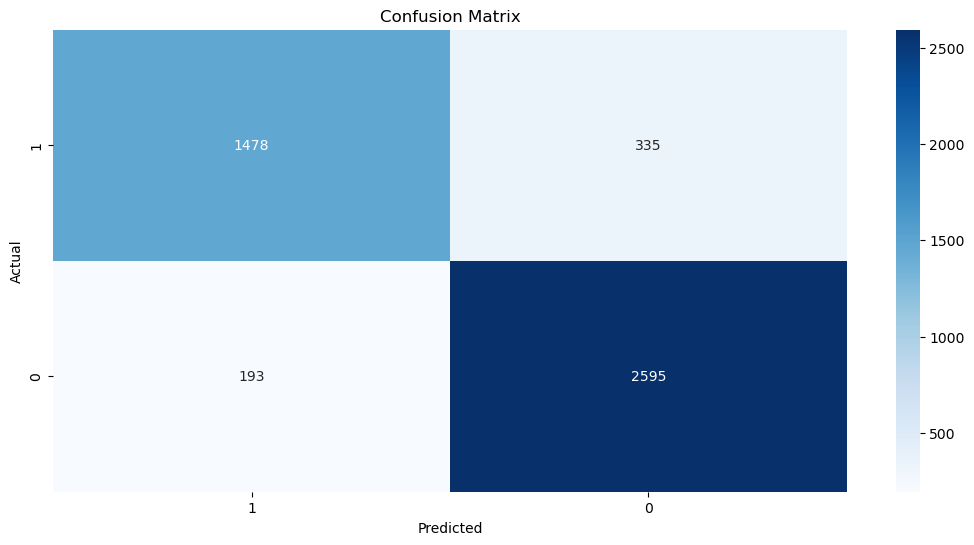

In [125]:
actual_classes, predicted_classes, _ = cross_val_predict(b_nb, cv, X.to_numpy(), y.to_numpy())
plot_confusion_matrix(actual_classes, predicted_classes, [1,0])

In [113]:
print(classification_report(actual_classes, predicted_classes))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2788
           1       0.88      0.82      0.85      1813

    accuracy                           0.89      4601
   macro avg       0.89      0.87      0.88      4601
weighted avg       0.89      0.89      0.88      4601



In [127]:
g_nb = GaussianNB()

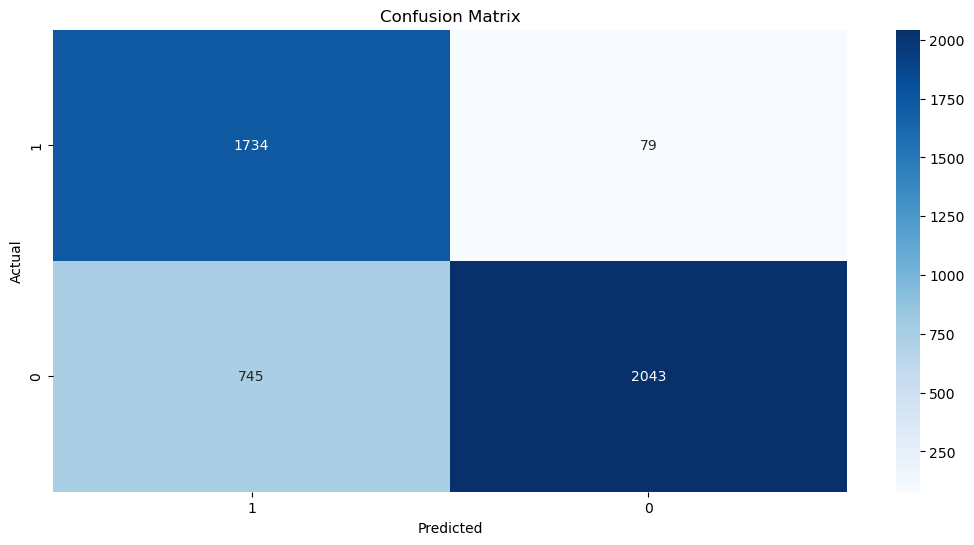

In [129]:
actual_classes, predicted_classes, _ = cross_val_predict(g_nb, cv, X.to_numpy(), y.to_numpy())
plot_confusion_matrix(actual_classes, predicted_classes, [1,0])

In [131]:
print(classification_report(actual_classes, predicted_classes))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83      2788
           1       0.70      0.96      0.81      1813

    accuracy                           0.82      4601
   macro avg       0.83      0.84      0.82      4601
weighted avg       0.86      0.82      0.82      4601

